<a href="https://colab.research.google.com/github/JuliethLopez/dlaicoursePractica/blob/master/Homework%2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this workbook we use the regularizer l2, regularizers allow you to apply penalties on layer parameters or layer activity during optimization, basically reduce the complexity of a model by reducing the complexity of the weights, helping to reduce overfitting. These penalties are summed into the loss function that the network optimizes.

The L2 regularization penalty is computed as: loss = l2 * reduce_sum(square(x)).

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-07-28 02:07:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-07-28 02:07:20 (63.7 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(200, return_sequences = True))) # An LSTM Layer
model.add(Dropout(0.1)) # A dropout layer
model.add(LSTM(100)) # Another LSTM Layer
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax')) # A Dense Layer
# Pick an optimizer
adam=Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) # Pick a loss function and an optimizer
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 400)           481600    
_________________________________________________________________
dropout (Dropout)            (None, 10, 400)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,322,071
Trainable params: 6,322,071
Non-trainable params: 0
______________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 13s 27ms/step - loss: 6.9442 - accuracy: 0.0219
Epoch 2/100
484/484 [==============================] - 13s 27ms/step - loss: 6.5177 - accuracy: 0.0250
Epoch 3/100
484/484 [==============================] - 13s 27ms/step - loss: 6.4222 - accuracy: 0.0252
Epoch 4/100
484/484 [==============================] - 13s 27ms/step - loss: 6.3829 - accuracy: 0.0265
Epoch 5/100
484/484 [==============================] - 13s 27ms/step - loss: 6.3236 - accuracy: 0.0269
Epoch 6/100
484/484 [==============================] - 13s 27ms/step - loss: 6.2719 - accuracy: 0.0314
Epoch 7/100
484/484 [==============================] - 13s 27ms/step - loss: 6.2298 - accuracy: 0.0342
Epoch 8/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1987 - accuracy: 0.0353
Epoch 9/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1686 - accuracy: 0.0374
Epoch 10/100
484/484 [==============================] - 13s 27ms/step - l

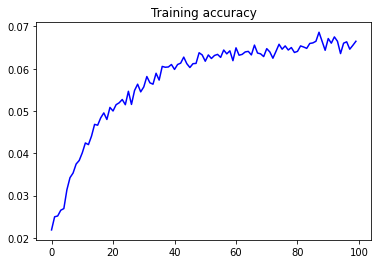

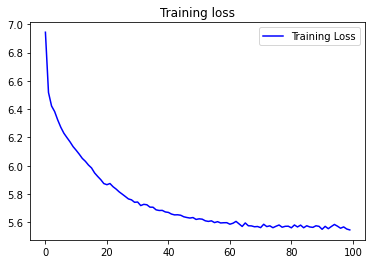

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope world of the art in the art in my love in my love in the art in my love in my love in the art in my love in my love in the art in my love in my love in the art in my love in my love in the art in my love in my love in the art in my love in my love in the art in my love in my love in the art in my love in my love in the art in my love in my love in the art in my love
